<a href="https://colab.research.google.com/github/nandhukumar86/AIML-Practice/blob/master/NLP_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1

### Basic Imports

In [1]:
import nltk
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline


In [2]:
fileUrl = '/content/drive/MyDrive/blogtext.csv'

### Read CSV

In [3]:
df = pd.read_csv(fileUrl)

### Basic Details

In [4]:
print('\nColumns:\n',df.columns)
print('\nData types:\n',df.dtypes)
print('\nSize:\n',df.size)
print('\nShape:\n',df.shape)
print('\nNull checks:\n',df.isnull().sum())
print('\nDescribe:\n',df.describe().T)



Columns:
 Index(['id', 'gender', 'age', 'topic', 'sign', 'date', 'text'], dtype='object')

Data types:
 id         int64
gender    object
age        int64
topic     object
sign      object
date      object
text      object
dtype: object

Size:
 4768988

Shape:
 (681284, 7)

Null checks:
 id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

Describe:
         count          mean           std  ...        50%        75%        max
id   681284.0  2.397802e+06  1.247723e+06  ...  2607577.0  3525660.0  4337650.0
age  681284.0  2.393233e+01  7.786009e+00  ...       24.0       26.0       48.0

[2 rows x 8 columns]


In [5]:
df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


### taking sample of 10% as processing is taking more time

In [6]:
df = df.sample(frac = 0.1)

In [7]:
df.shape

(68128, 7)

**We can remove the Id, date columns as it is not significant on this classification**

In [8]:
df.drop(columns= ['id','date'], inplace=True)

In [9]:
df.head()

,gender,age,topic,sign,text
75136,female,14,Student,Virgo,urlLink More original art from The ...
489247,female,16,Student,Aries,"mood: tired, sad music: simpsons ..."
267405,female,16,Student,Sagittarius,i duno im really really tured and dont ...
48768,female,46,indUnk,Leo,"urlLink This is a disturbing trend, ..."
637997,female,25,indUnk,Cancer,The party's over! (a.k.a. Please...


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68128 entries, 75136 to 103864
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   gender  68128 non-null  object
 1   age     68128 non-null  int64 
 2   topic   68128 non-null  object
 3   sign    68128 non-null  object
 4   text    68128 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.1+ MB


### Distribution of Age

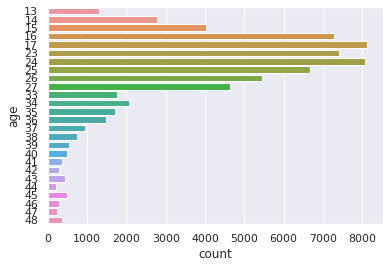

In [11]:
sns.countplot(y = df['age']);

**The Problem statement is Multi label classification.**

**Input**: Text

**Output**: Gender, Age, Topic, Sign

### Distribution of Gender

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


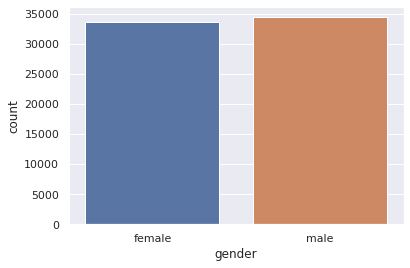

In [12]:
sns.countplot(df['gender'])

### Distribution of Sign

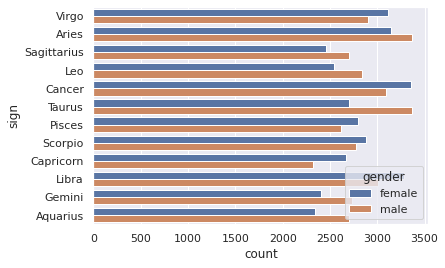

In [13]:
sns.countplot(y = df['sign'], hue=df["gender"])

### Unique Topics

In [14]:
df['topic'].unique()

array(['Student', 'indUnk', 'Science', 'Non-Profit',
       'Communications-Media', 'Tourism', 'Education', 'Transportation',
       'Technology', 'Publishing', 'Telecommunications', 'Fashion',
       'Government', 'HumanResources', 'Marketing', 'Accounting', 'Arts',
       'Engineering', 'Sports-Recreation', 'BusinessServices',
       'Chemicals', 'Internet', 'RealEstate', 'Agriculture',
       'Advertising', 'Military', 'Automotive', 'Biotech',
       'Museums-Libraries', 'Manufacturing', 'Consulting', 'Banking',
       'Religion', 'Law', 'Architecture', 'Construction',
       'LawEnforcement-Security', 'InvestmentBanking', 'Environment',
       'Maritime'], dtype=object)

In [15]:
df['topic'].value_counts()

indUnk                     25120
Student                    15371
Technology                  4184
Arts                        3240
Education                   2953
Communications-Media        2005
Internet                    1627
Non-Profit                  1507
Engineering                 1190
Law                          863
Publishing                   771
Science                      707
Government                   685
Consulting                   584
Religion                     531
Fashion                      480
Marketing                    462
BusinessServices             431
Banking                      412
Telecommunications           412
Advertising                  403
Chemicals                    399
Accounting                   389
Military                     340
Sports-Recreation            339
Museums-Libraries            331
RealEstate                   315
HumanResources               294
Transportation               237
Biotech                      237
Manufactur

### Some Stats

In [16]:
df.describe(include = [np.object]).T

,count,unique,top,freq
gender,68128,2,male,34428
topic,68128,40,indUnk,25120
sign,68128,12,Aries,6510
text,68128,66559,urlLink,42


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,68128.0,23.953617,7.804783,13.0,17.0,24.0,26.0,48.0


**Defining X, y as Input and Output**

In [18]:
X = df[['text']]
y = df[['age','gender','topic','sign']]

In [19]:
X.head()

,text
75136,urlLink More original art from The ...
489247,"mood: tired, sad music: simpsons ..."
267405,i duno im really really tured and dont ...
48768,"urlLink This is a disturbing trend, ..."
637997,The party's over! (a.k.a. Please...


**Processing y**

In [20]:
y.head()

,age,gender,topic,sign
75136,14,female,Student,Virgo
489247,16,female,Student,Aries
267405,16,female,Student,Sagittarius
48768,46,female,indUnk,Leo
637997,25,female,indUnk,Cancer


In [21]:
def age_mod(x):
  if x>=13 and x<=17:
    return '10s'
  elif x>=23 and x<=27:
    return '20s'
  else:
    return '30s' 

In [22]:
y['age'] = y['age'].apply(age_mod)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
y.head()

,age,gender,topic,sign
75136,10s,female,Student,Virgo
489247,10s,female,Student,Aries
267405,10s,female,Student,Sagittarius
48768,30s,female,indUnk,Leo
637997,20s,female,indUnk,Cancer


In [24]:
# get dummies for the given columns
y_processed = pd.get_dummies(y, columns=['age', 'gender', 'topic', 'sign'])
# not dropping first values as I am going to use Neural Nets for the classification

In [25]:
y_processed.head()

,age_10s,age_20s,age_30s,gender_female,gender_male,topic_Accounting,topic_Advertising,topic_Agriculture,topic_Architecture,topic_Arts,topic_Automotive,topic_Banking,topic_Biotech,topic_BusinessServices,topic_Chemicals,topic_Communications-Media,topic_Construction,topic_Consulting,topic_Education,topic_Engineering,topic_Environment,topic_Fashion,topic_Government,topic_HumanResources,topic_Internet,topic_InvestmentBanking,topic_Law,topic_LawEnforcement-Security,topic_Manufacturing,topic_Maritime,topic_Marketing,topic_Military,topic_Museums-Libraries,topic_Non-Profit,topic_Publishing,topic_RealEstate,topic_Religion,topic_Science,topic_Sports-Recreation,topic_Student,topic_Technology,topic_Telecommunications,topic_Tourism,topic_Transportation,topic_indUnk,sign_Aquarius,sign_Aries,sign_Cancer,sign_Capricorn,sign_Gemini,sign_Leo,sign_Libra,sign_Pisces,sign_Sagittarius,sign_Scorpio,sign_Taurus,sign_Virgo
75136,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
489247,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
267405,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
48768,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
637997,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0


**Processing X**

1. remove extra space, special character, punctuations
2. remove the stop words
3. convert to lower case
4. Stemming

In [26]:
X.head()

,text
75136,urlLink More original art from The ...
489247,"mood: tired, sad music: simpsons ..."
267405,i duno im really really tured and dont ...
48768,"urlLink This is a disturbing trend, ..."
637997,The party's over! (a.k.a. Please...


In [27]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68128 entries, 75136 to 103864
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    68128 non-null  object
dtypes: object(1)
memory usage: 3.5+ MB


In [28]:
X = X.astype(str)

In [29]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68128 entries, 75136 to 103864
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    68128 non-null  object
dtypes: object(1)
memory usage: 3.5+ MB


In [30]:
X['text'] = X['text'].str.lower()

In [31]:
X.head(2)

,text
75136,urllink more original art from the ...
489247,"mood: tired, sad music: simpsons ..."


In [32]:
X['text'] = X['text'].str.replace('[^\w\s]','')

In [33]:
X.head(2)

,text
75136,urllink more original art from the ...
489247,mood tired sad music simpsons si...


In [34]:
from nltk.corpus import stopwords
nltk.download('stopwords')

eng_stopwords = set(stopwords.words('english'))

X['text'] = X['text'].apply(lambda text: " ".join([word for word in str(text).split() if word not in eng_stopwords]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
X.head()

,text
75136,urllink original art rick makes smile toogrin
489247,mood tired sad music simpsons sigh fighting dy...
267405,duno im really really tured dont went cross co...
48768,urllink disturbing trend especially surprising...
637997,partys aka please excuse bawl eyes may know wo...


In [36]:
X['text'] = X['text'].apply(lambda text: " ".join(text.split()))

In [37]:
X.head()

,text
75136,urllink original art rick makes smile toogrin
489247,mood tired sad music simpsons sigh fighting dy...
267405,duno im really really tured dont went cross co...
48768,urllink disturbing trend especially surprising...
637997,partys aka please excuse bawl eyes may know wo...


In [38]:
# from nltk.stem import PorterStemmer
# # from nltk.stem import LancasterStemmer
# # from nltk.stem.snowball import SnowballStemmer

# stemmer = PorterStemmer()
# # stemmer = SnowballStemmer("english", ignore_stopwords=True)

# df["text"].apply(lambda texts : [stemmer.stem(text) for text in texts])

In [39]:
# unable to run the stemmer as it was time consuming and colab is crashing

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

vertorizer = TfidfVectorizer()

X_vector = vertorizer.fit_transform(X['text'])

In [41]:
X_vector.shape

(68128, 294661)

In [42]:
X_vector[10].todense().shape

(1, 294661)

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_vector, y_processed, test_size=0.30, random_state=100)


In [44]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier




In [45]:
model = OneVsRestClassifier(LogisticRegression(solver='sag'))
# model = OneVsRestClassifier(DecisionTreeClassifier(criterion = 'gini', random_state=1))

In [46]:
model.fit(X_train, y_train)


OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='sag', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [47]:
y_test_predict = model.predict(X_test)
y_train_predict = model.predict(X_train)


In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy_train: ',accuracy_score(y_train, y_train_predict))
print('Accuracy_test: ',accuracy_score(y_test, y_test_predict))

print('Precision_train: ',precision_score(y_train, y_train_predict, average='micro'))
print('Precision_test: ',precision_score(y_test, y_test_predict, average='micro'))

print('Recall_train: ',recall_score(y_train, y_train_predict, average='micro'))
print('Recall_test: ',recall_score(y_test, y_test_predict, average='micro'))

print('F1_train: ',f1_score(y_train, y_train_predict, average='micro'))
print('F1_test: ',f1_score(y_test, y_test_predict, average='micro'))



Accuracy_train:  0.004403531212648619
Accuracy_test:  0.0031312686530652186
Precision_train:  0.8343968955481298
Precision_test:  0.677862796833773
Recall_train:  0.40579064354463296
Recall_test:  0.31423993346054113
F1_train:  0.5460310518259348
F1_test:  0.4294143210536872


In [49]:
columns = y_test.columns

In [50]:
def printresults(id):
  print('Actual Value:', columns[np.array(y_test)[id] == 1])
  print('Predicted Value:', columns[y_test_predict[id] == 1])

In [51]:
printresults(5000)

Actual Value: Index(['age_20s', 'gender_female', 'topic_Student', 'sign_Cancer'], dtype='object')
Predicted Value: Index(['age_30s', 'gender_male'], dtype='object')


In [52]:
printresults(6000)

Actual Value: Index(['age_10s', 'gender_male', 'topic_indUnk', 'sign_Gemini'], dtype='object')
Predicted Value: Index(['gender_male'], dtype='object')


In [53]:
printresults(10000)

Actual Value: Index(['age_20s', 'gender_male', 'topic_Education', 'sign_Taurus'], dtype='object')
Predicted Value: Index(['age_20s', 'gender_female'], dtype='object')


In [54]:
printresults(10001)

Actual Value: Index(['age_20s', 'gender_male', 'topic_indUnk', 'sign_Libra'], dtype='object')
Predicted Value: Index(['age_20s', 'gender_female'], dtype='object')


In [55]:
printresults(10002)

Actual Value: Index(['age_20s', 'gender_female', 'topic_indUnk', 'sign_Pisces'], dtype='object')
Predicted Value: Index(['age_20s', 'gender_female', 'topic_indUnk'], dtype='object')


# Part 2

In [68]:
botPath = '/content/drive/MyDrive/GL Bot.json'

In [69]:
import json

In [70]:
with open(botPath) as file:
  corpus = json.load(file)

In [71]:
print(corpus)

{'intents': [{'tag': 'Intro', 'patterns': ['hi', 'how are you', 'is anyone there', 'hello', 'whats up', 'hey', 'yo', 'listen', 'please help me', 'i am learner from', 'i belong to', 'aiml batch', 'aifl batch', 'i am from', 'my pm is', 'blended', 'online', 'i am from', 'hey ya', 'talking to you for first time'], 'responses': ['Hello! how can i help you ?'], 'context_set': ''}, {'tag': 'Exit', 'patterns': ['thank you', 'thanks', 'cya', 'see you', 'later', 'see you later', 'goodbye', 'i am leaving', 'have a Good day', 'you helped me', 'thanks a lot', 'thanks a ton', 'you are the best', 'great help', 'too good', 'you are a good learning buddy'], 'responses': ['I hope I was able to assist you, Good Bye'], 'context_set': ''}, {'tag': 'Olympus', 'patterns': ['olympus', 'explain me how olympus works', 'I am not able to understand olympus', 'olympus window not working', 'no access to olympus', 'unable to see link in olympus', 'no link visible on olympus', 'whom to contact for olympus', 'lot of p

In [72]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [516]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

X_chat = []
y_chat = []

for intent in corpus['intents']:
  for pattern in intent['patterns']:
    pattern = nltk.word_tokenize(pattern)
    X_chat.append(pattern)
    
    response = intent['responses'][0]
    y_chat.append(response)

In [517]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

chat_vertorizer = TfidfVectorizer(preprocessor=lambda x: x, tokenizer=lambda x: x)

# chat_vertorizer = CountVectorizer()

In [518]:
X_chat_array = np.array([np.array(xi) for xi in X_chat])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [519]:
chat_vertorizer.fit(X_chat_array)
X_chat_transformed = chat_vertorizer.fit_transform(X_chat_array)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [520]:
X_chat_transfomed_array = np.array(X_chat_transformed.todense())

In [521]:
X_chat_transfomed_array

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.49604679,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [522]:
type(y_chat)

list

In [523]:
# get dummies for the given columns
y_chat_encoded = pd.get_dummies(pd.DataFrame(y_chat))



In [524]:
y_chat_encoded

,0_Hello! how can i help you ?,0_I am your virtual learning assistant,"0_I hope I was able to assist you, Good Bye",0_Link: Machine Learning wiki,0_Link: Neural Nets wiki,0_Link: Olympus wiki,0_Please use respectful words,0_Tarnsferring the request to your PM
0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
123,0,0,0,0,0,0,0,1
124,0,0,0,0,0,0,0,1
125,0,0,0,0,0,0,0,1
126,0,0,0,0,0,0,0,1


In [525]:
chat_columns = y_chat_encoded.columns

In [526]:
chat_columns.size

8

In [527]:
X_chat_transfomed_array.shape

(128, 162)

In [528]:
# from sklearn.tree import DecisionTreeClassifier

# model = OneVsRestClassifier(DecisionTreeClassifier(criterion = 'gini', random_state=1))

# model.fit(X_chat_transfomed_array, y_chat_encoded)




In [582]:
tf.keras.backend.clear_session()

In [583]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Dense(128, activation='relu', kernel_initializer='he_normal', input_shape=(162,)))
model.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(8, activation='softmax'))




In [584]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               20864     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 520       
Total params: 29,640
Trainable params: 29,640
Non-trainable params: 0
_________________________________________________________________


In [585]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # "binary_crossentropy" for binary classification.
# # "categorical_crossentropy" for multi-class classification.
# # "mse" for regression


In [586]:
# pass callback as property during fit: callbacks=[earlystop]
earlystop = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=10, min_delta=0.01)


In [587]:
model.fit(X_chat_transfomed_array, y_chat_encoded, epochs=50, batch_size=32, verbose=1, callbacks=[earlystop]) 


Epoch 1/50
4/4 [==============================] - 0s 3ms/step - loss: 2.0941 - accuracy: 0.1021
Epoch 2/50
4/4 [==============================] - 0s 3ms/step - loss: 2.0528 - accuracy: 0.1792
Epoch 3/50
4/4 [==============================] - 0s 3ms/step - loss: 2.0194 - accuracy: 0.2396
Epoch 4/50
4/4 [==============================] - 0s 3ms/step - loss: 1.9772 - accuracy: 0.4229
Epoch 5/50
4/4 [==============================] - 0s 3ms/step - loss: 1.9367 - accuracy: 0.4948
Epoch 6/50
4/4 [==============================] - 0s 3ms/step - loss: 1.8916 - accuracy: 0.6073
Epoch 7/50
4/4 [==============================] - 0s 3ms/step - loss: 1.8692 - accuracy: 0.6135
Epoch 8/50
4/4 [==============================] - 0s 3ms/step - loss: 1.8025 - accuracy: 0.6698
Epoch 9/50
4/4 [==============================] - 0s 3ms/step - loss: 1.7527 - accuracy: 0.6896
Epoch 10/50
4/4 [==============================] - 0s 3ms/step - loss: 1.6909 - accuracy: 0.7188
Epoch 11/50
4/4 [======================

In [598]:
def reply(inputtext):
  inputtext = nltk.word_tokenize(inputtext)
  testing = [inputtext]
  testing2 = np.array(chat_vertorizer.transform(testing).todense())
  return chat_columns[model.predict(testing2).argmax()]

In [599]:
reply('add a ticket')

'0_Tarnsferring the request to your PM'

In [603]:
def chat():
  print("Nippu: You are chatting with Nippu!! \n type 'quit' to end the conversation")
  while True:
    userinput = input("\n You:")
    if userinput.lower() == 'quit':
      break
    result = reply(userinput.lower()).split('_')[1]
    print('\nNippu: ', result)

In [605]:
chat()

Nippu: You are chatting with Nippu!! 
 type 'quit' to end the conversation

 You:hi

Nippu:  Hello! how can i help you ?

 You:not having access to olympus

Nippu:  Link: Olympus wiki

 You:what is machine learning

Nippu:  Link: Machine Learning wiki 

 You:what is epoch?

Nippu:  Link: Neural Nets wiki

 You:what is your sweet name?

Nippu:  I am your virtual learning assistant

 You:useless fellow

Nippu:  Tarnsferring the request to your PM

 You:you are stupid machine

Nippu:  Please use respectful words

 You:how to create a ticket

Nippu:  Tarnsferring the request to your PM

 You:quit
